In [1]:
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests')

c:\Users\Marcin_Kosiba\anaconda3\envs\inz\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(metadata, name='FAST_ML')
synthesizer.fit(data=real_data)

c:\Users\Marcin_Kosiba\anaconda3\envs\inz\lib\site-packages\rdt\transformers\categorical.py:329: FutureWarning: The 'FrequencyEncoder' transformer will no longer be supported in future versions of the RDT library. Please use the 'UniformEncoder' transformer instead.
  warnings.warn(


In [3]:
metadata

{
    "primary_key": "guest_email",
    "columns": {
        "guest_email": {
            "sdtype": "email",
            "pii": true
        },
        "has_rewards": {
            "sdtype": "boolean"
        },
        "room_type": {
            "sdtype": "categorical"
        },
        "amenities_fee": {
            "sdtype": "numerical",
            "computer_representation": "Float"
        },
        "checkin_date": {
            "sdtype": "datetime",
            "datetime_format": "%d %b %Y"
        },
        "checkout_date": {
            "sdtype": "datetime",
            "datetime_format": "%d %b %Y"
        },
        "room_rate": {
            "sdtype": "numerical",
            "computer_representation": "Float"
        },
        "billing_address": {
            "sdtype": "address",
            "pii": true
        },
        "credit_card_number": {
            "sdtype": "credit_card_number",
            "pii": true
        }
    },
    "METADATA_SPEC_VERSION": "SINGLE_TABL

In [4]:
real_data, metadata = download_demo(
    modality='sequential',
    dataset_name='nasdaq100_2019'
)

In [21]:
from sdv.sequential import PARSynthesizer
from sdv.metadata import MultiTableMetadata

metadata = MultiTableMetadata()
metadata.detect_from_dataframes(data={'data': real_data})

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.plot_data import plot_skab
from sklearn.metrics import accuracy_score, f1_score

In [28]:
path_to_data = 'datasets/raw/data/'

In [29]:
# benchmark files checking
all_files=[]
import os
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))



# datasets with anomalies loading
list_of_df = [pd.read_csv(file, 
                          sep=';', 
                          index_col='datetime', 
                          parse_dates=True) for file in all_files if 'anomaly-free' not in file]

list_of_df = [df.drop(columns=['changepoint']) for df in list_of_df]
# anomaly-free df loading
anomaly_free_df = pd.read_csv([file for file in all_files if 'anomaly-free' in file][0], 
                            sep=';', 
                            index_col='datetime', 
                            parse_dates=True)

In [58]:
data = list_of_df[0].drop(columns=['anomaly'])[:400]

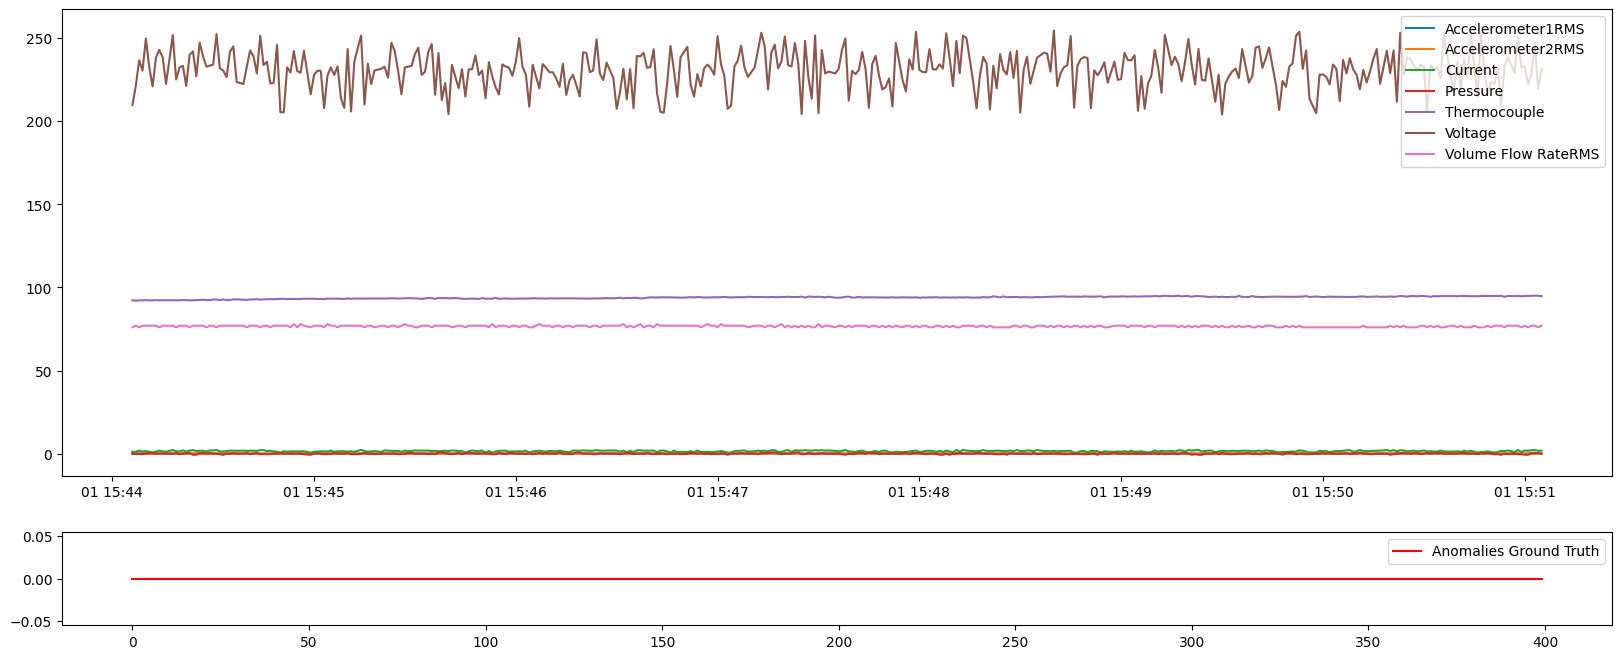

In [59]:
plot_skab(data, [0 for x in range(data.shape[0])])

In [60]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

In [61]:
from sdv.lite import SingleTablePreset

# Step 1: Create the synthesizer
synthesizer = SingleTablePreset(metadata, name='FAST_ML')

# Step 2: Train the synthesizer
# synthesizer.fit(data)

c:\Users\Marcin_Kosiba\anaconda3\envs\inz\lib\site-packages\rdt\transformers\categorical.py:329: FutureWarning: The 'FrequencyEncoder' transformer will no longer be supported in future versions of the RDT library. Please use the 'UniformEncoder' transformer instead.
  warnings.warn(


In [62]:
synthesizer.fit(data)

In [63]:
synthetic_data = synthesizer.sample(num_rows=400)

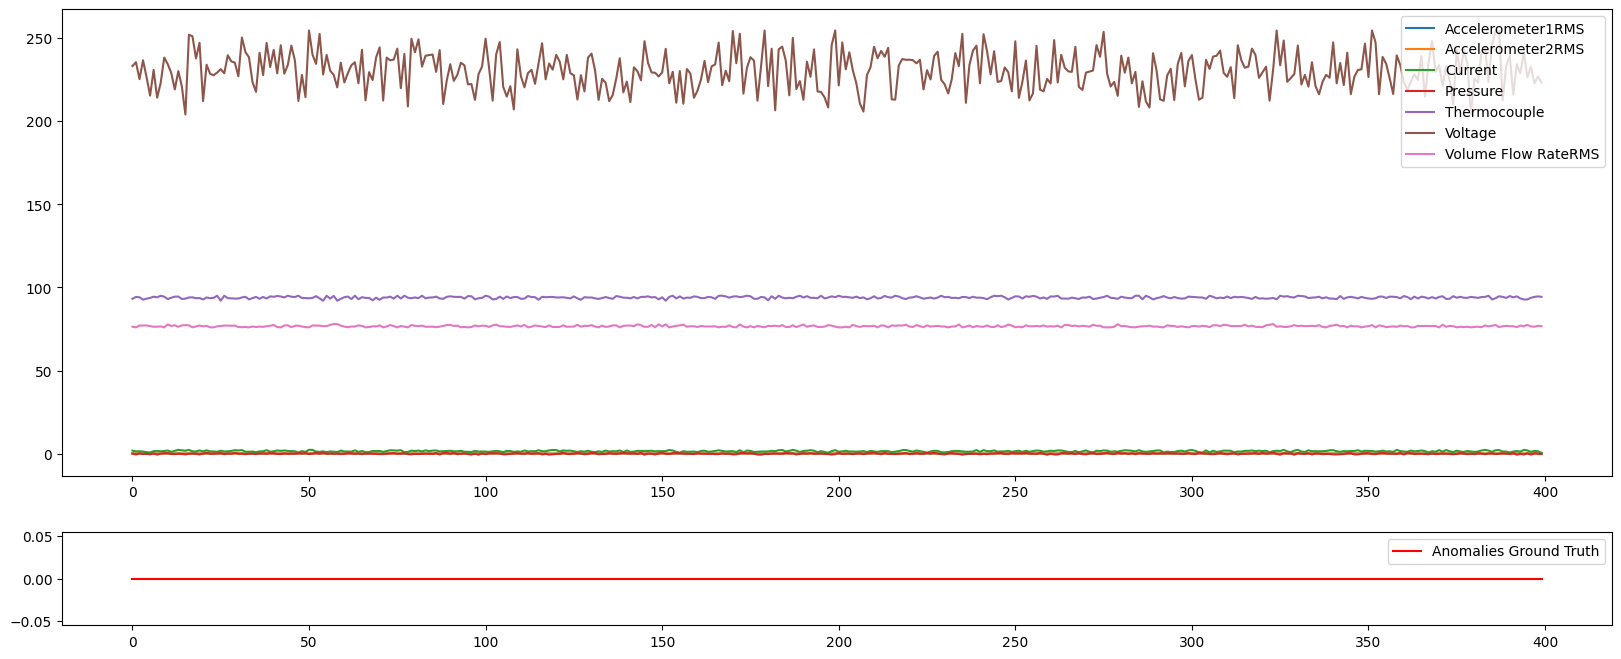

In [64]:
plot_skab(synthetic_data, [0 for x in range(synthetic_data.shape[0])])

In [65]:
from sdv.single_table import CopulaGANSynthesizer

synthesizer = CopulaGANSynthesizer(metadata)
synthesizer.fit(data)

In [66]:
synthetic_data = synthesizer.sample(num_rows=400)

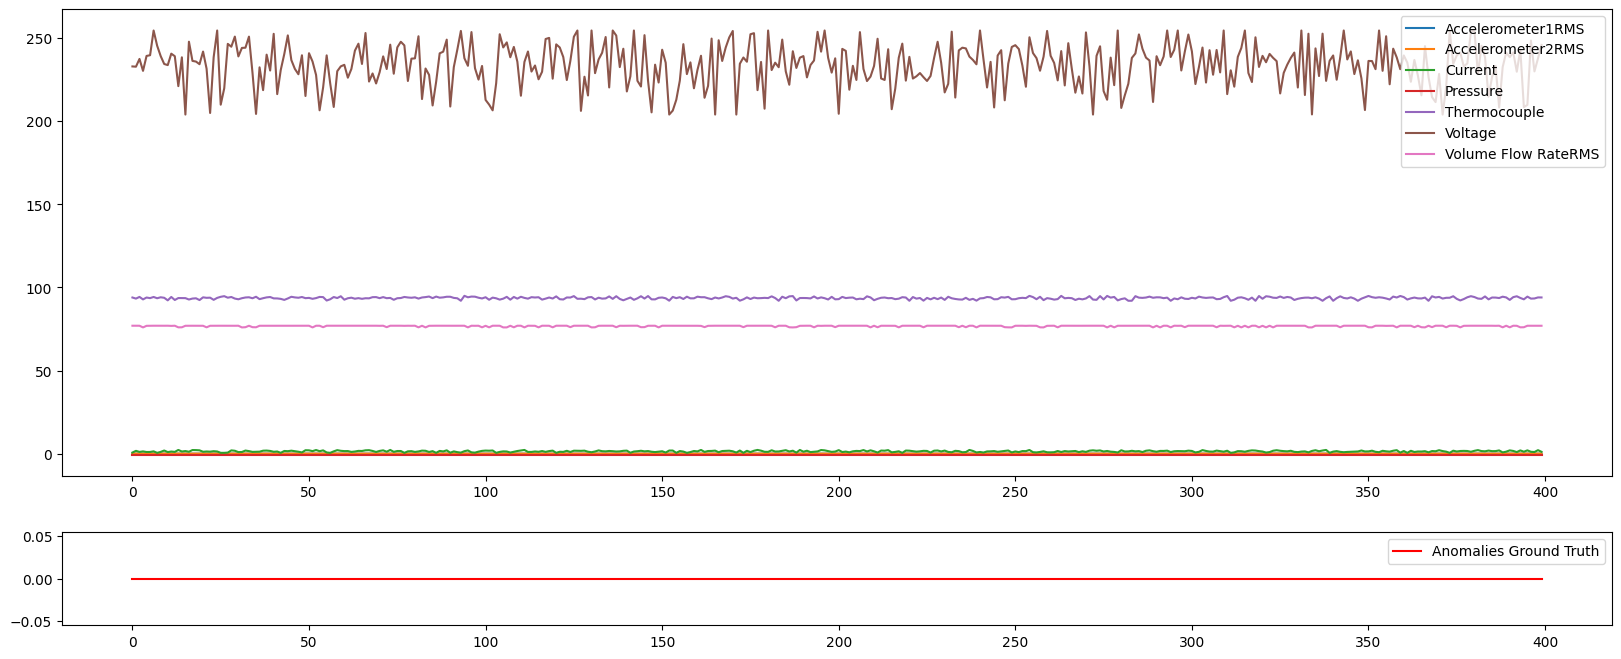

In [67]:
plot_skab(synthetic_data, [0 for x in range(synthetic_data.shape[0])])